In [10]:
using MLDatasets, DataFrames
using Statistics, StatsBase
include("unsupervised.jl")
include("utils.jl")
include("metrics.jl")
plotlyjs()
# Load Iris dataset
iris = Iris()

dataset Iris:
  metadata   =>    Dict{String, Any} with 4 entries
  features   =>    150×4 DataFrame
  targets    =>    150×1 DataFrame
  dataframe  =>    150×5 DataFrame

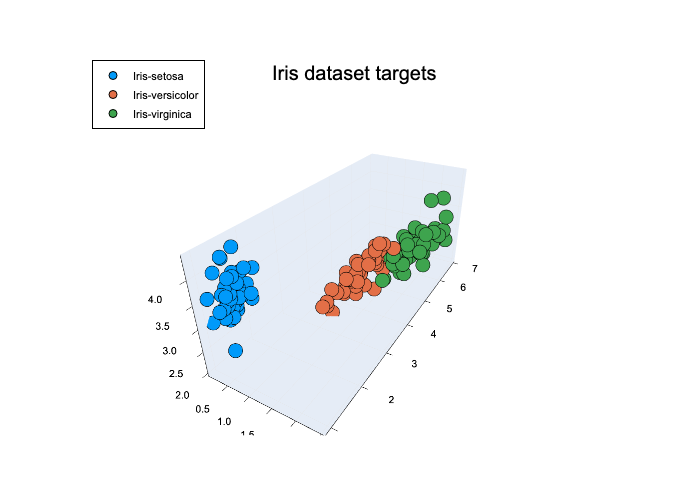

In [11]:
# Plot the data
scatter(iris.features[!, :petalwidth], iris.features[!, :petallength], iris.features[!, :sepalwidth],group = iris.targets[!, :class], legend = :topleft, title = "Iris dataset targets") 


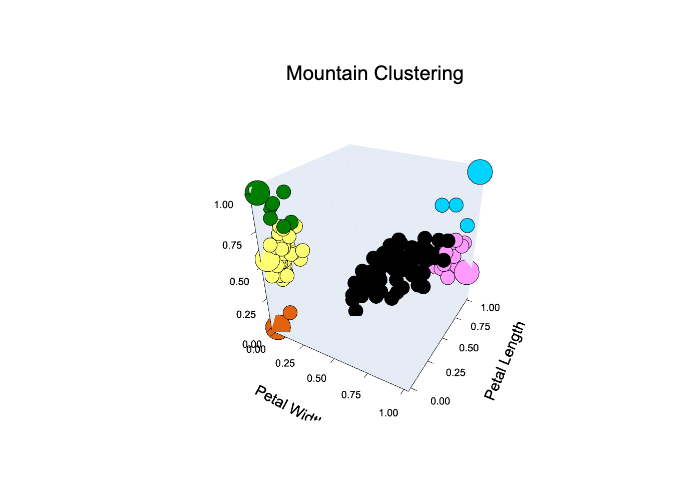

In [12]:
# Load Iris dataset
iris = Iris()
# Normalize data in [0, 1]
X = Matrix(iris.features[!, [:petalwidth, :petallength, :sepalwidth]])
dt = fit(UnitRangeTransform, X, dims=1)
X = StatsBase.transform(dt, X)
centers, clusters = mountain_clustering(X, 0.5, 0.5, 10, euclidean_distance)
# plot clusters
plot_clusters(X, clusters, centers, "Mountain Clustering", "Petal Width", "Petal Length", "Sepal Width")